In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score

In [277]:
df = pd.read_csv("Data/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [278]:
df.columns = df.columns.str.strip() #column names fixed....

In [279]:
# Out of sample dataset...
oos = df.iloc[:10]
df = df.drop(oos.index).reset_index(drop=True)

# Feature Selection..


In [280]:
# correlation of feature: Net Income Flag is NaN, because it consist value 1 only..And thus it is not important so I am removing it..
print(df["Net Income Flag"].value_counts())
df.drop("Net Income Flag", axis=1, inplace=True)

Net Income Flag
1    6809
Name: count, dtype: int64


In [281]:
feature_df = df.drop(("Bankrupt?"), axis=1)
target_df = df["Bankrupt?"]

In [282]:
corr_matrix= feature_df.corr()

In [313]:
threshold = 0.8
highly_correlated_features = [corr_matrix.columns[j] for i in range(len(corr_matrix.columns)) for j in range(i + 1, len(corr_matrix.columns)) if abs(corr_matrix.iloc[i, j]) > threshold]
len(list(set(highly_correlated_features)))

25

In [272]:
#highly_correlated_features

In [273]:
# Extracting oos file for client use...
oos = oos.drop(highly_correlated_features, axis=1)
oos.drop("Net Income Flag", axis=1, inplace=True)
#oos.to_csv('out_of_sample_2.csv')


In [314]:
#reducing multicolinearity....
X = feature_df.drop(highly_correlated_features, axis=1)
y = target_df

In [316]:
X.shape, y.shape

((6809, 69), (6809,))

# XGBoost...

In [390]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, KFold
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [375]:
X_train.shape

(5447, 69)

Scaling After splitting cab be save us from data leakage.....

In [360]:
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# X_train = pd.DataFrame(X_train_scaled, columns= sc.get_feature_names_out())
# X_test = pd.DataFrame(X_test_scaled, columns= sc.get_feature_names_out())

# Note: Scaling is not helping....

In [377]:
xg_model = XGBClassifier(scale_pos_weight=45, random_state = 42)

In [378]:
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [379]:
y_pred = xg_model.predict(X_test)
y_train_pred = xg_model.predict(X_train)
y_pred_proba = xg_model.predict_proba(X_test)
y_train_pred_proba = xg_model.predict_proba(X_train)

TEST-ACCURACY-SCORE: 
 0.9691629955947136

TRAIN-ACCURACY-SCORE: 
 1.0

F1-SCORE: 
 0.475

PRECISION: 
 0.5135135135135135

RECALL: 
 0.4418604651162791

ROC-AUC-SCORE: 
 0.951090501965901

CONFUSION_MATRIX: 
 [[1301   18]
 [  24   19]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1319
           1       0.51      0.44      0.47        43

    accuracy                           0.97      1362
   macro avg       0.75      0.71      0.73      1362
weighted avg       0.97      0.97      0.97      1362



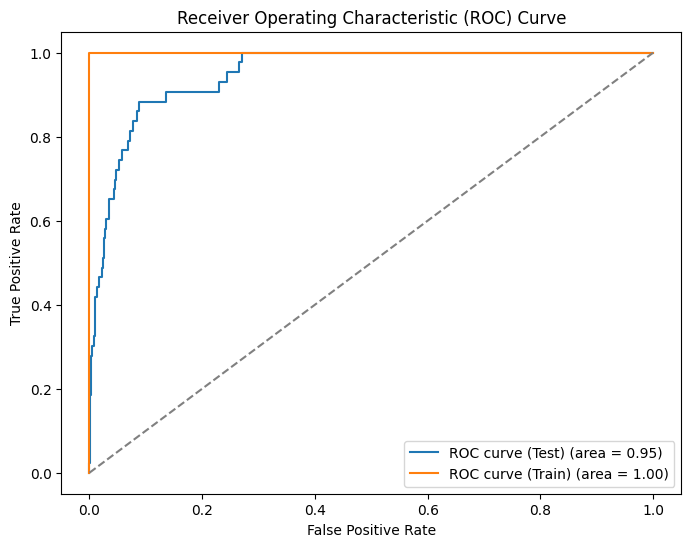

In [380]:
print(f"TEST-ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"TRAIN-ACCURACY-SCORE: \n {accuracy_score(y_train, y_train_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"PRECISION: \n {precision_score(y_test, y_pred)}\n")
print(f"RECALL: \n {recall_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (Test) (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot(fpr_train, tpr_train, label="ROC curve (Train) (area = %0.2f)" % roc_auc_score(y_train, y_train_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Hyperparameter tunning for xgboost!!

In [392]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xg_model, X_train, y_train, scoring='roc_auc', cv=skf, n_jobs=-1)

print('Score ROC AUC:', scores)
print('Mean ROC AUC:', scores.mean())

Score ROC AUC: [0.97504456 0.92557932 0.93059269 0.88569519 0.93460339 0.93304367
 0.92673413 0.9037839  0.93403282 0.92722402]
Mean ROC AUC: 0.9276333699197579


In [93]:
param = {
    'scale_pos_weight' : [1, 100],
    'n_estimators': [100, 200],
    'max_depth': [7, 10],
    'alpha': [1, 5, 10],
    'gamma': [2, 5, 10],
    'learning_rate': [0.03, 0.1, 0.3]
}


In [94]:
rcv = RandomizedSearchCV(xg_model, param_distributions=param, cv=skf, n_iter = 100)


In [95]:
rcv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importa...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100,
                   param_distributions={'alpha': [1, 5, 10],
                                        'gamma': [2, 5, 10],
                                        'learning_rate': [0.03, 0.1, 0.3],
                                        'max_depth': [7, 10],
                                        'n_estimators': [100, 200],
                                        'scale_pos_weight': [1, 100]})

In [96]:
rcv.score(X_train, y_train)

0.9827427941986414

In [107]:
rcv.best_params_

{'scale_pos_weight': 1,
 'n_estimators': 100,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 2,
 'alpha': 5}

In [159]:
xg_model_new = XGBClassifier(n_estimators = 100, max_depth = 10, learning_rate = 0.3, gamma = 2, alpha = 5, random_state= 42)

In [160]:
xg_model_new.fit(X_train, y_train)

XGBClassifier(alpha=5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [161]:
y_pred = xg_model_new.predict(X_test)
y_train_pred = xg_model_new.predict(X_train)
y_pred_proba = xg_model_new.predict_proba(X_test)
y_train_pred_proba = xg_model_new.predict_proba(X_train)

TEST-ACCURACY-SCORE: 
 0.973568281938326

TRAIN-ACCURACY-SCORE: 
 0.9817456986991188

F1-SCORE: 
 0.41304347826086957

PRECISION: 
 0.6785714285714286

RECALL: 
 0.296875

ROC-AUC-SCORE: 
 0.9602624431531076

CONFUSION_MATRIX: 
 [[1970    9]
 [  45   19]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1979
           1       0.68      0.30      0.41        64

    accuracy                           0.97      2043
   macro avg       0.83      0.65      0.70      2043
weighted avg       0.97      0.97      0.97      2043



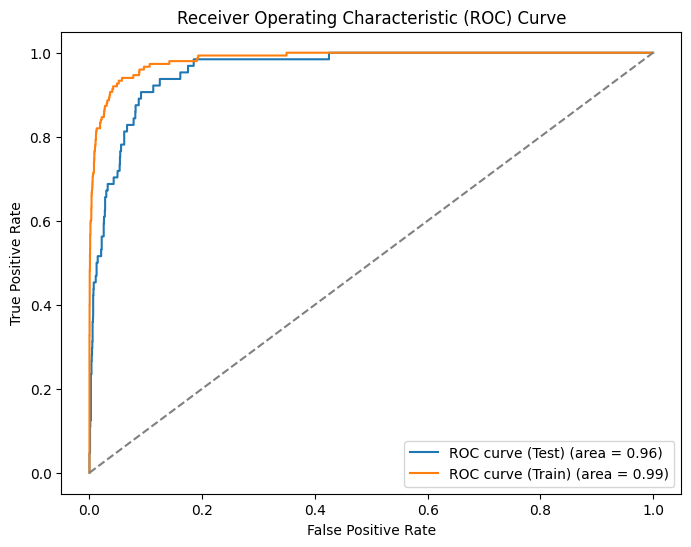

In [162]:
print(f"TEST-ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"TRAIN-ACCURACY-SCORE: \n {accuracy_score(y_train, y_train_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"PRECISION: \n {precision_score(y_test, y_pred)}\n")
print(f"RECALL: \n {recall_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (Test) (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot(fpr_train, tpr_train, label="ROC curve (Train) (area = %0.2f)" % roc_auc_score(y_train, y_train_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Catboost....

In [430]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from catboost import CatBoostClassifier
import shap
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

c:\Users\dp971\Coading\Durham_College\Introduction_of_AI_Development\Assignment_3\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [369]:
# sc = StandardScaler()
# X_train_scaled = sc.fit_transform(X_train)
# X_test_scaled = sc.transform(X_test)

# X_train = pd.DataFrame(X_train_scaled, columns= sc.get_feature_names_out())
# X_test = pd.DataFrame(X_test_scaled, columns= sc.get_feature_names_out())
#Note: Scaling is not helping....

In [416]:
cat_model = CatBoostClassifier(auto_class_weights='Balanced', random_state=42)
cat_model.fit(X_train, y_train)

Learning rate set to 0.021246
0:	learn: 0.6700792	total: 53.5ms	remaining: 53.4s
1:	learn: 0.6528985	total: 65ms	remaining: 32.4s
2:	learn: 0.6321026	total: 76.2ms	remaining: 25.3s
3:	learn: 0.6119773	total: 87.9ms	remaining: 21.9s
4:	learn: 0.5970797	total: 99.2ms	remaining: 19.7s
5:	learn: 0.5772233	total: 115ms	remaining: 19s
6:	learn: 0.5614233	total: 129ms	remaining: 18.4s
7:	learn: 0.5441245	total: 140ms	remaining: 17.4s
8:	learn: 0.5303350	total: 154ms	remaining: 16.9s
9:	learn: 0.5182160	total: 168ms	remaining: 16.7s
10:	learn: 0.5036460	total: 186ms	remaining: 16.8s
11:	learn: 0.4956749	total: 202ms	remaining: 16.7s
12:	learn: 0.4848935	total: 217ms	remaining: 16.5s
13:	learn: 0.4759120	total: 231ms	remaining: 16.3s
14:	learn: 0.4655561	total: 244ms	remaining: 16.1s
15:	learn: 0.4557513	total: 266ms	remaining: 16.4s
16:	learn: 0.4455701	total: 286ms	remaining: 16.5s
17:	learn: 0.4366376	total: 300ms	remaining: 16.4s
18:	learn: 0.4273763	total: 316ms	remaining: 16.3s
19:	learn:

In [417]:
y_train_pred = cat_model.predict(X_train)
y_pred = cat_model.predict(X_test)
y_train_pred_proba = cat_model.predict_proba(X_train)
y_pred_proba = cat_model.predict_proba(X_test)

TEST-ACCURACY-SCORE: 
 0.972834067547724

TRAIN-ACCURACY-SCORE: 
 0.9998164127042408

F1-SCORE: 
 0.5934065934065934

PRECISION: 
 0.5625

RECALL: 
 0.627906976744186

ROC-AUC-SCORE: 
 0.9539291570428619

Brier Score: 
0.024172771703934066

CONFUSION_MATRIX: 
 [[1298   21]
 [  16   27]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1319
           1       0.56      0.63      0.59        43

    accuracy                           0.97      1362
   macro avg       0.78      0.81      0.79      1362
weighted avg       0.97      0.97      0.97      1362



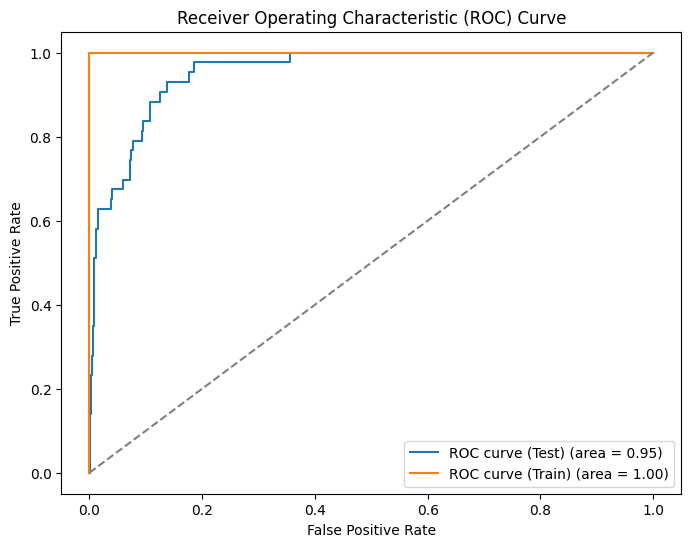

In [421]:
print(f"TEST-ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"TRAIN-ACCURACY-SCORE: \n {accuracy_score(y_train, y_train_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"PRECISION: \n {precision_score(y_test, y_pred)}\n")
print(f"RECALL: \n {recall_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"Brier Score: \n{brier_score_loss(y_test, y_pred_proba[:, 1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (Test) (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot(fpr_train, tpr_train, label="ROC curve (Train) (area = %0.2f)" % roc_auc_score(y_train, y_train_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Saving cat_boost model

In [398]:
# with open('catboost_model.pkl', "wb") as file:
#     pickle.dump(cat_model, file)

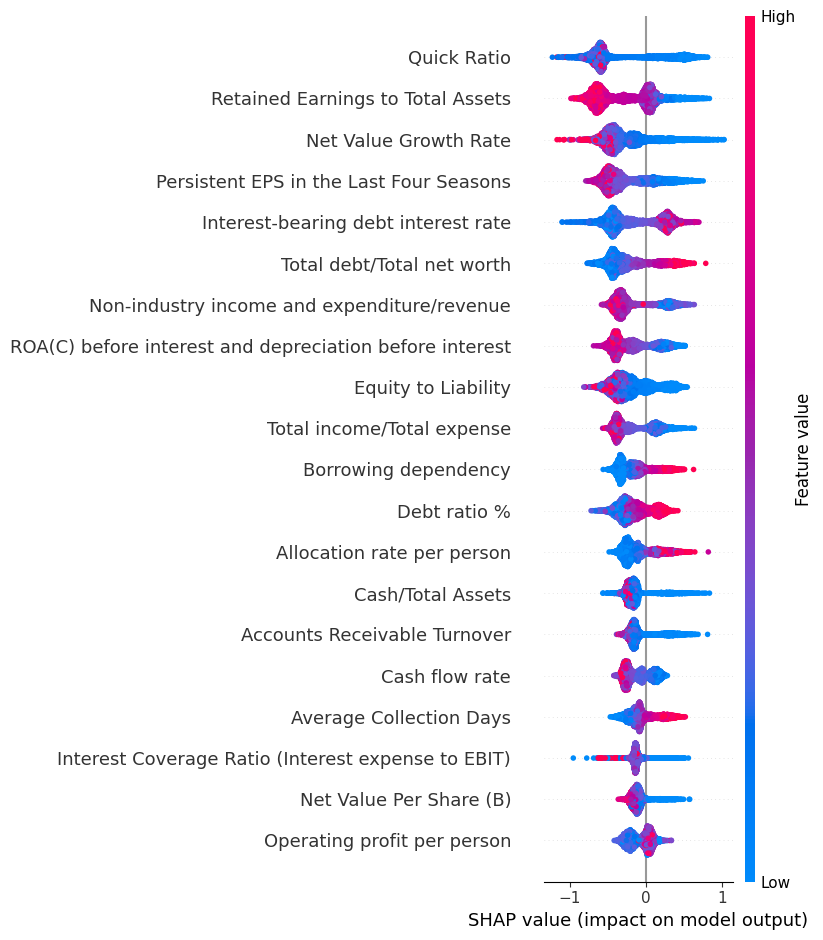

In [433]:
# Explain predictions
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_train)

# Plot SHAP values
shap.summary_plot(shap_values, X_train)

## Hyperparameter Tunning for catboost....

In [203]:
params = {
    'depth': [4, 10],
    'learning_rate': [0.01,0.03, 0.3],
    'iterations': [100, 500],
    'l2_leaf_reg': [1, 5, 10],
    'border_count': [32, 255],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [0.0, 1.0],
}

In [204]:
cb = CatBoostClassifier()

In [207]:
rcv = RandomizedSearchCV(cb, param_distributions=params, scoring="f1", cv=skf, n_iter = 10, verbose=1, n_jobs=-1)


In [209]:
rcv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 0.2526663	total: 40.7ms	remaining: 4.03s
1:	learn: 0.1359738	total: 46.6ms	remaining: 2.28s
2:	learn: 0.1023938	total: 49.4ms	remaining: 1.6s
3:	learn: 0.0869389	total: 51.8ms	remaining: 1.24s
4:	learn: 0.0833940	total: 54.5ms	remaining: 1.04s
5:	learn: 0.0793930	total: 57.3ms	remaining: 898ms
6:	learn: 0.0755120	total: 60.7ms	remaining: 807ms
7:	learn: 0.0730888	total: 62.9ms	remaining: 724ms
8:	learn: 0.0703694	total: 68.1ms	remaining: 688ms
9:	learn: 0.0684581	total: 70.7ms	remaining: 637ms
10:	learn: 0.0664789	total: 73.4ms	remaining: 594ms
11:	learn: 0.0655966	total: 75.6ms	remaining: 554ms
12:	learn: 0.0645492	total: 78.4ms	remaining: 525ms
13:	learn: 0.0636020	total: 81.5ms	remaining: 501ms
14:	learn: 0.0620987	total: 83.9ms	remaining: 475ms
15:	learn: 0.0605126	total: 86ms	remaining: 452ms
16:	learn: 0.0599295	total: 88.2ms	remaining: 431ms
17:	learn: 0.0585076	total: 90.7ms	remaining: 413ms
18:	learn: 0.0

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001FBBFC71090>,
                   n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.5, 1.0],
                                        'border_count': [32, 255],
                                        'depth': [4, 10],
                                        'iterations': [100, 500],
                                        'l2_leaf_reg': [1, 5, 10],
                                        'learning_rate': [0.01, 0.03, 0.3],
                                        'random_strength': [0.0, 1.0]},
                   scoring='f1', verbose=1)

In [210]:
rcv.score(X_train, y_train)

0.9726027397260274

In [211]:
rcv.best_params_

{'random_strength': 0.0,
 'learning_rate': 0.3,
 'l2_leaf_reg': 5,
 'iterations': 100,
 'depth': 4,
 'border_count': 32,
 'bagging_temperature': 1.0}

In [387]:
cat_model_new = CatBoostClassifier(auto_class_weights='Balanced', early_stopping_rounds=50,learning_rate=0.03, l2_leaf_reg=5, depth=4, border_count=32, bagging_temperature=1, random_state=42)
cat_model_new.fit(X_train, y_train)

0:	learn: 0.6707186	total: 8.83ms	remaining: 8.82s
1:	learn: 0.6440525	total: 12.1ms	remaining: 6.03s
2:	learn: 0.6177244	total: 14.8ms	remaining: 4.92s
3:	learn: 0.6008375	total: 18.3ms	remaining: 4.56s
4:	learn: 0.5844894	total: 20.9ms	remaining: 4.15s
5:	learn: 0.5667481	total: 23.4ms	remaining: 3.87s
6:	learn: 0.5518332	total: 25.9ms	remaining: 3.67s
7:	learn: 0.5338198	total: 28.4ms	remaining: 3.52s
8:	learn: 0.5214281	total: 30.8ms	remaining: 3.39s
9:	learn: 0.5083164	total: 32.7ms	remaining: 3.24s
10:	learn: 0.4959268	total: 34.8ms	remaining: 3.13s
11:	learn: 0.4863195	total: 37.3ms	remaining: 3.07s
12:	learn: 0.4758970	total: 39.3ms	remaining: 2.98s
13:	learn: 0.4655604	total: 41.2ms	remaining: 2.9s
14:	learn: 0.4553622	total: 43.2ms	remaining: 2.83s
15:	learn: 0.4467197	total: 45.1ms	remaining: 2.77s
16:	learn: 0.4366393	total: 47.1ms	remaining: 2.72s
17:	learn: 0.4293786	total: 49ms	remaining: 2.67s
18:	learn: 0.4250892	total: 51.5ms	remaining: 2.66s
19:	learn: 0.4168280	tota

In [388]:
y_train_pred = cat_model_new.predict(X_train)
y_pred = cat_model_new.predict(X_test)
y_train_pred_proba = cat_model_new.predict_proba(X_train)
y_pred_proba = cat_model_new.predict_proba(X_test)

TEST-ACCURACY-SCORE: 
 0.9669603524229075

TRAIN-ACCURACY-SCORE: 
 0.9946759684229851

F1-SCORE: 
 0.5360824742268041

PRECISION: 
 0.48148148148148145

RECALL: 
 0.6046511627906976

ROC-AUC-SCORE: 
 0.9467179152635012

CONFUSION_MATRIX: 
 [[1291   28]
 [  17   26]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1319
           1       0.48      0.60      0.54        43

    accuracy                           0.97      1362
   macro avg       0.73      0.79      0.76      1362
weighted avg       0.97      0.97      0.97      1362



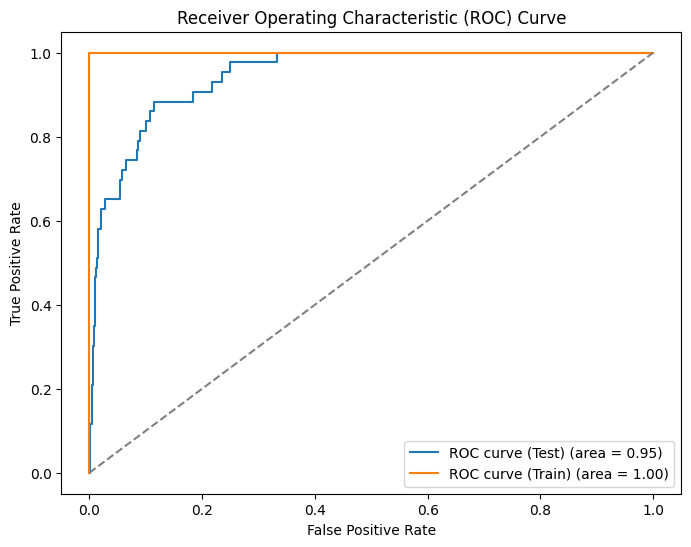

In [389]:
print(f"TEST-ACCURACY-SCORE: \n {accuracy_score(y_test, y_pred)}\n")
print(f"TRAIN-ACCURACY-SCORE: \n {accuracy_score(y_train, y_train_pred)}\n")
print(f"F1-SCORE: \n {f1_score(y_test, y_pred)}\n")
print(f"PRECISION: \n {precision_score(y_test, y_pred)}\n")
print(f"RECALL: \n {recall_score(y_test, y_pred)}\n")
print(f"ROC-AUC-SCORE: \n {roc_auc_score(y_test, y_pred_proba[:,1])}\n")
print(f"CONFUSION_MATRIX: \n {confusion_matrix(y_test, y_pred)}\n")
print(F"CLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_train_pred_proba[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (Test) (area = %0.2f)" % roc_auc_score(y_test, y_pred_proba[:, 1]))
plt.plot(fpr_train, tpr_train, label="ROC curve (Train) (area = %0.2f)" % roc_auc_score(y_train, y_train_pred_proba[:, 1]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()